# Lung Report

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2g}'.format)

In [2]:
from sklearn_utils.utils import SkUtilsIO, filter_by_label

X, y = SkUtilsIO('../datasets/diseases/lung_plasma_analysis_with_std.json', gz=True).from_json()
X, y = filter_by_label(X, y, 'Adenosquamous', reverse=True)

In [3]:
from metabolitics.preprocessing import MetaboliticsPipeline

pre = MetaboliticsPipeline(['reaction-diff', 'pathway-transformer', 'transport-pathway-elimination'])
X_pathways = pre.fit_transform(X, y)

pre = MetaboliticsPipeline(['reaction-diff', 'feature-selection', 'pathway-transformer', 'transport-pathway-elimination'])
X_fs_pathways = pre.fit_transform(X, y)

In [4]:
from sklearn_utils.utils import feature_importance_report

df_pathways = feature_importance_report(X_pathways, y)
df_pathways

labels,Adenocarcinoma,healthy,F,pval
Fructose and mannose metabolism,-54,-4e-15,8.7,0.28
Pentose phosphate pathway,-46,1.2e-14,3.6,0.36
Pyruvate metabolism,-40,6.2e-15,3.2,0.36
Pyrimidine catabolism,-36,-4.9e-15,3.7,0.36
Purine catabolism,70,-5.3e-15,4.2,0.36
Lysine metabolism,81,1.2e-14,3,0.36
Triacylglycerol synthesis,-41,1.5e-14,3,0.36
Methionine and cysteine metabolism,-62,1.3e-14,5,0.36
Vitamin C metabolism,12,8.6e-15,4.8,0.36
Vitamin A metabolism,-16,6.8e-15,3.2,0.36


In [5]:
df_selected_pathways = feature_importance_report(X_fs_pathways, y)
df_selected_pathways

labels,Adenocarcinoma,healthy,F,pval
Purine catabolism,7.7e+02,3.6e-14,13,0.014
beta-Alanine metabolism,-5.8e+02,-6.4e-14,7,0.023
Eicosanoid metabolism,-2.4e+02,-2.1e-13,7.3,0.023
Pyrimidine synthesis,-2.7e+02,7.1e-14,8.8,0.023
Fructose and mannose metabolism,-1.4e+02,-3.7e-14,10,0.023
Glutamate metabolism,-2.1e+02,8.9e-14,6.8,0.023
Glutathione metabolism,5e+02,-1.4e-14,6.9,0.023
Glycerophospholipid metabolism,-1.1e+02,-2.4e-14,6.7,0.023
Miscellaneous,-2.3e+02,-2.1e-14,6.8,0.023
Inositol phosphate metabolism,-56,2.9e-14,8.6,0.023


## Heatmaps

In [25]:
import pandas as pd
import seaborn as sns

from sklearn_utils.utils import feature_importance_report


def plot_heatmap(X, y, top_n=10, metric='correlation', method='complete'):
    '''
    Plot heatmap which shows features with classes.
    :param X: list of dict
    :param y: labels
    :param top_n: most important n feature
    :param metric: metric which will be used for clustering
    :param method: method which will be used for clustering
    '''
    sns.set(color_codes=True)

    df = feature_importance_report(X, y)

    df_sns = pd.DataFrame().from_records(X)[df[:top_n].index].T
    df_sns.columns = y

    color_mapping = dict(zip(set(y), sns.mpl_palette("Set2", len(set(y)))))

    return sns.clustermap(df_sns, figsize=(22, 22), standard_scale=1,
                          metric=metric, method=method,
                          col_colors=[color_mapping[i] for i in y])


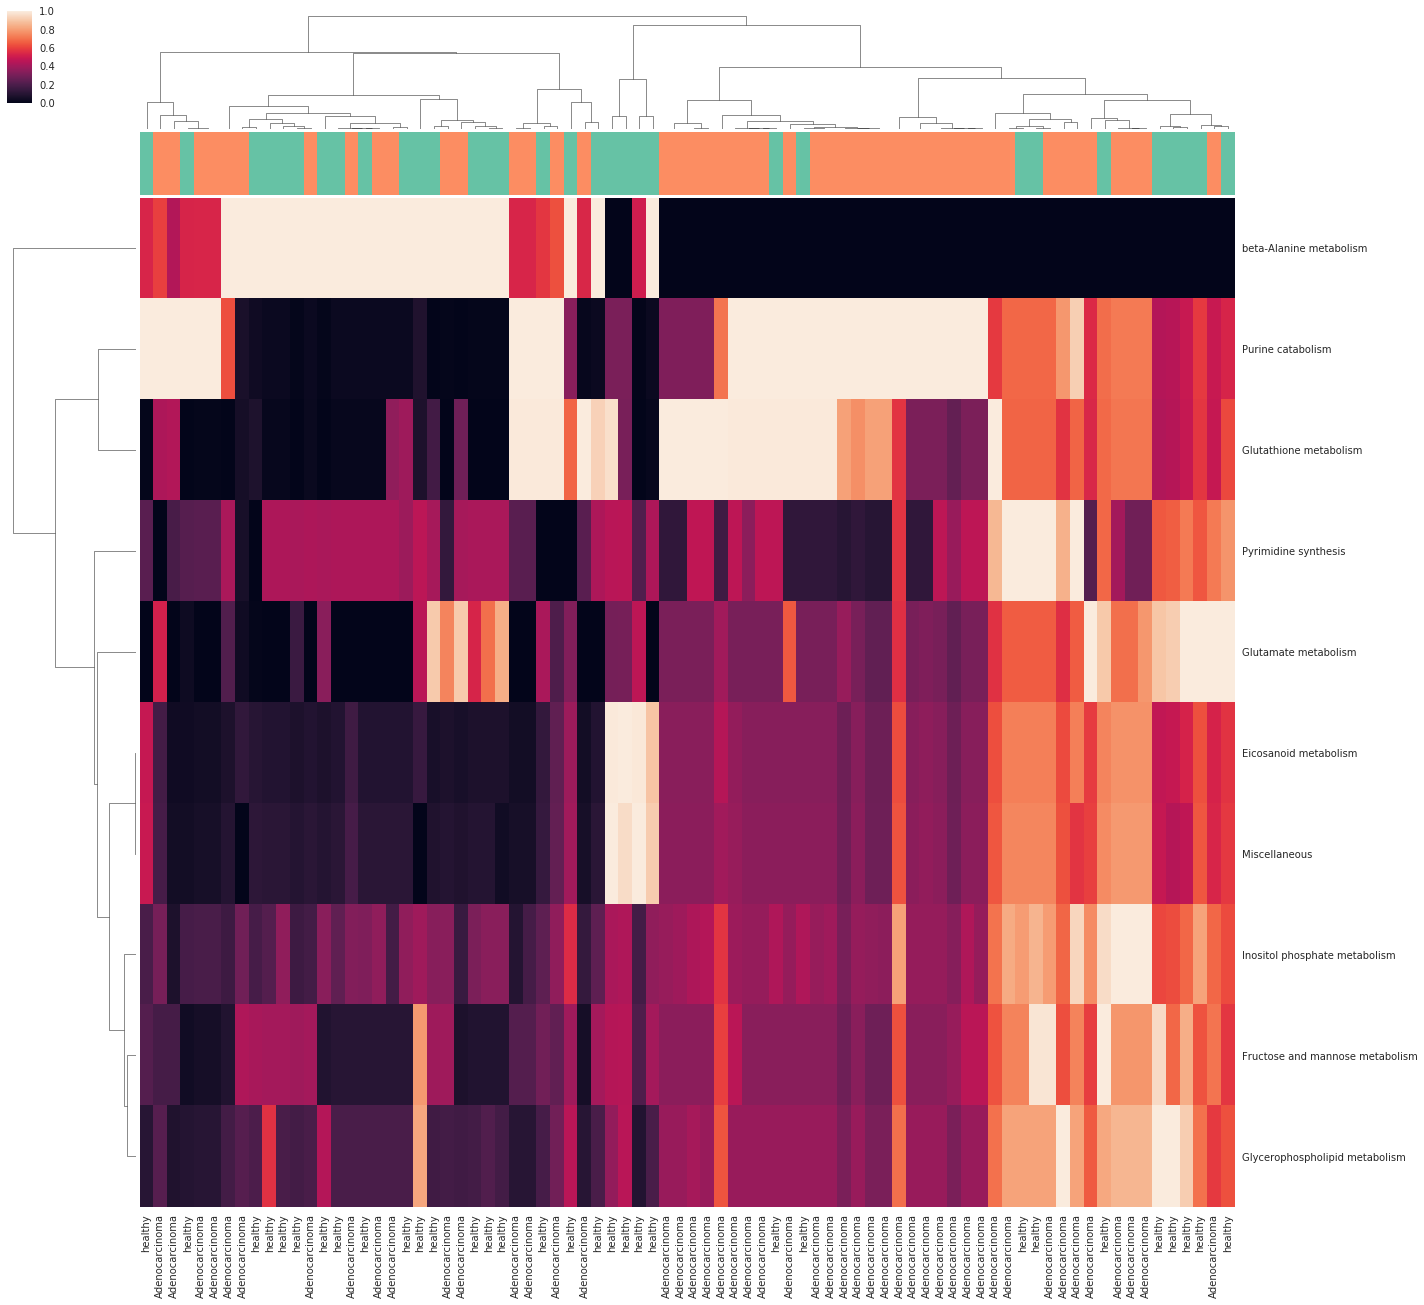

In [42]:
%matplotlib inline

# from sklearn_utils.visualization import plot_heatmap

plot_heatmap(X_fs_pathways, y)

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
            ('dy', MetaboliticsPipeline(['reaction-diff'])),
            ('vect', DictVectorizer(sparse=False)),
            ('pca', PCA()),
            ('clf', LogisticRegression(C=0.1e-9, random_state=43))
        ])

In [55]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GroupKFold, cross_validate

kf = StratifiedKFold(n_splits=5, random_state=43)
  
scores = cross_validate(pipe, X, y, cv=kf, n_jobs=1, scoring='f1_micro')

for j in ['test_score', 'train_score']:
    print('kfold test: %s' % scores[j])
    print('mean: %s' % scores[j].mean().round(3))
    print('std: %s' % scores[j].std().round(3))

kfold test: [0.58823529 0.64705882 0.625      0.6        0.53333333]
mean: 0.599
std: 0.039
kfold test: [0.82539683 0.77777778 0.78125    0.75384615 0.76923077]
mean: 0.782
std: 0.024


/opt/conda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122 FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
